In [127]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import matplotlib.pyplot  as plt

import seaborn as sns

In [128]:
train_payment = pd.read_csv('./train_payment.csv')
train_activity = pd.read_csv('./train_activity.csv')
train_label = pd.read_csv('./train_label_add.csv')

# 1) 40000명으로 압축해서 군집화 

In [129]:
# 파일 압축 및 합치기
act = train_activity.groupby(['acc_id']).sum().reset_index()
pay = train_payment.groupby(['acc_id']).sum().reset_index()
act_pay = pd.merge(act, pay, on ='acc_id',how='outer').fillna(0)

In [130]:
# 전체 sum
knn_act = act_pay[['acc_id','playtime','solo_exp']]
feature=knn_act[['playtime','solo_exp']]

In [136]:
# create model and prediction
model = KMeans(n_clusters=2,algorithm='auto')

model.fit(feature)

predict = pd.DataFrame(model.predict(feature))

predict.columns=['predict']



In [137]:
r = pd.concat([feature,predict],axis=1)

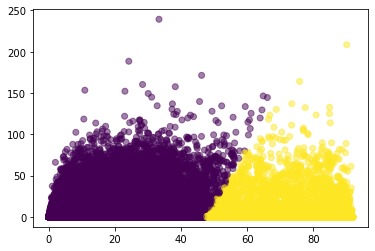

In [138]:
plt.scatter(r['playtime'],r['solo_exp'],c=r['predict'],alpha=0.5)

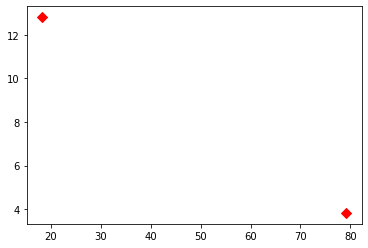

In [139]:
centers = pd.DataFrame(model.cluster_centers_,columns=['playtime','solo_exp'])

center_x = centers['playtime']

center_y = centers['solo_exp']

plt.scatter(center_x,center_y,s=50,marker='D',c='r')

plt.show()

In [140]:
acc = knn_act['acc_id']
r2 = pd.concat([acc, r],axis=1)
r2 = pd.merge(r2, train_label, on ='acc_id').drop('Unnamed: 0',axis=1)

<BarContainer object of 2 artists>

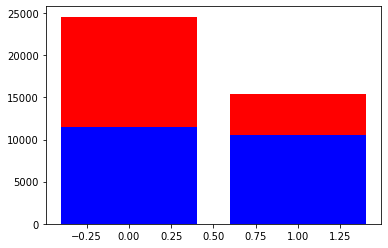

In [141]:
a=r2[(r2['predict']==0) & (r2['secession']==0)]['acc_id'].count()
b=r2[(r2['predict']==0) & (r2['secession']==1)]['acc_id'].count()
c=r2[(r2['predict']==1) & (r2['secession']==0)]['acc_id'].count()
d=r2[(r2['predict']==1) & (r2['secession']==1)]['acc_id'].count()
#e=r2[(r2['predict']==2) & (r2['secession']==0)]['acc_id'].count()
#f=r2[(r2['predict']==2) & (r2['secession']==1)]['acc_id'].count()

good = [a,c]
bad = [b,d]
X = np.arange(len(good))
plt.bar(X, good, color='b')
plt.bar(X, bad, color='r', bottom=good)


In [142]:
cor = r2.corr()
cor['predict'].sort_values(ascending=False)

predict          1.000000
playtime         0.914503
survival_time    0.198165
acc_id          -0.000997
total_spent     -0.022077
amount_spent    -0.055470
secession       -0.205629
solo_exp        -0.247324
Name: predict, dtype: float64

# 2) day별로 군집화 

In [143]:
# 1단계: 필요한 컬럼 불러오기 및 char 압축
# 2단계: 접속하지 않은 날은 0으로 하는 컬럼 만들기
# 3단계: 일별로 군집화 실시
# 4단계: 시계열 군집화 실시

In [144]:
# 1단계: 필요한 컬럼 불러오기 및 char 압축
knn_act = train_activity[['day','acc_id','char_id','playtime','solo_exp']]
knn_act = knn_act.groupby(['day','acc_id']).sum().reset_index().drop('char_id',axis=1)

In [145]:
# 2단계: 접속하지 않은 날은 0으로 하는 컬럼 만들기

# acc_id 40000개와 28일인 데이터프레임 만들기
knn=np.zeros(shape=(40000*28,2))
acc_id = train_label['acc_id']
acc_id = acc_id.values

for i in range(0,40000):
    for j in range(0,28):
        n = 28*i+j
        knn[n][0] = acc[i]
        knn[n][1] = j+1
knn_df = DataFrame(knn, columns=['acc_id','day'])

# 만든 데이터프레임에 훈련데이터 merge
knn_df = pd.merge(knn_df, knn_act, on=['acc_id','day'], how='outer')
#.fillna(0)

In [149]:
knn_act.shape

(949358, 4)

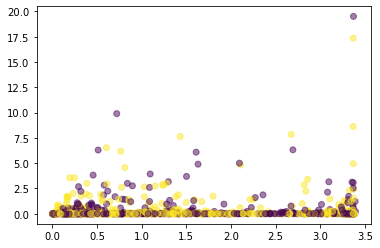

In [126]:
# 3단계: 일별로 군집화 실시
feature = knn_df[(knn_df['day']==28)][['playtime','solo_exp']]

# create model and prediction
model = KMeans(n_clusters=2,algorithm='auto')

model.fit(feature)

predict = pd.DataFrame(model.predict(feature))

predict.columns=['predict']

r = pd.concat([feature,predict],axis=1)
plt.scatter(r['playtime'],r['solo_exp'],c=r['predict'],alpha=0.5)

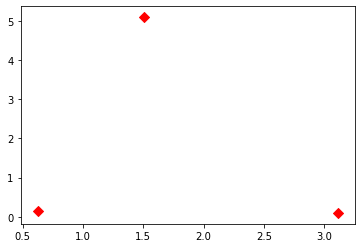

In [125]:
centers = pd.DataFrame(model.cluster_centers_,columns=['playtime','solo_exp'])

center_x = centers['playtime']

center_y = centers['solo_exp']

plt.scatter(center_x,center_y,s=50,marker='D',c='r')

plt.show()

In [121]:
acc = knn_act['acc_id']
r2 = pd.concat([acc, r],axis=1)
r2 = pd.merge(r2, train_label, on ='acc_id').drop('Unnamed: 0',axis=1)

<BarContainer object of 2 artists>

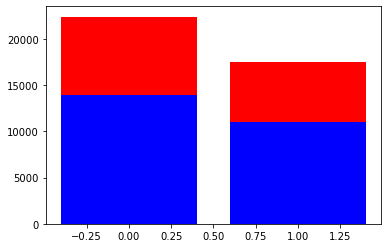

In [122]:
a=r2[(r2['predict']==0) & (r2['secession']==0)]['acc_id'].count()
b=r2[(r2['predict']==0) & (r2['secession']==1)]['acc_id'].count()
c=r2[(r2['predict']==1) & (r2['secession']==0)]['acc_id'].count()
d=r2[(r2['predict']==1) & (r2['secession']==1)]['acc_id'].count()
#e=r2[(r2['predict']==2) & (r2['secession']==0)]['acc_id'].count()
#f=r2[(r2['predict']==2) & (r2['secession']==1)]['acc_id'].count()

good = [a,c]
bad = [b,d]
X = np.arange(len(good))
plt.bar(X, good, color='b')
plt.bar(X, bad, color='r', bottom=good)